In [0]:

from pyspark import SparkContext
from pyspark.sql import SQLContext,Row
from pyspark.sql.types import *
from pyspark.sql import SparkSession
spark = SparkContext.getOrCreate()
data = sc.textFile('s3://aws-logs-134528623767-us-east-1/Data/lat_longs.txt')
parsed_latLon = data.map(lambda line: line.split()) \
         .map(lambda fields: (float(fields[0]),float(fields[1]))).cache()

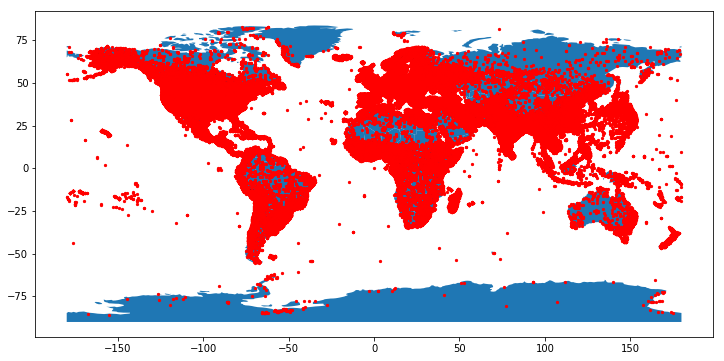

In [0]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import descartes
import matplotlib.pyplot as plt
import pandas as pd
ListOfLatitude = []
ListOfLongitude = []
# temp_var = parsed_sampleGeo.map(lambda k: k.split(","))
log_df = sqlContext.createDataFrame(parsed_latLon)
df = log_df.selectExpr("_1 as Latitude","_2 as Longitude")
df.registerTempTable("Locationlatlon")
Latitude = [x["Latitude"] for x in df.rdd.collect()]
Longitude = [x["Longitude"] for x in df.rdd.collect()]
latitude_services = map(float,Latitude)
longitude_services = map(float,Longitude)
geometry = [Point(xy) for xy in zip(longitude_services,latitude_services)]
gdf = GeoDataFrame(df.rdd.collect(), geometry=geometry) 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(20, 6)), marker='o', color='red', markersize=5);